# Problema: Masa Resorte Amortiguador

In [ ]:
# Librerias utiles
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import imageio.v2 as imageio
from google.colab import drive
from google.colab import files
from os import TMP_MAX

# Modelo Físico

## Variables y parámetros útiles

In [ ]:
# Parámetros físicos
l0 = 0.25 # m
g = 9.81  # m/s^2
m = 1     # kg
b = 0.5     # Ns/m
k = 2    # N/m
tiempo_total = 20 # s
delta_T = 0.01 # s
t_datos = 0.5*tiempo_total

# Calculo de parámetros útiles
omega = np.sqrt(k/m)
seda  = b/(2*np.sqrt(m*k))
phi = np.arctan(-seda)
# Definir el vector de tiempo
t = np.arange(0, tiempo_total, delta_T)

print(f"omega = {omega}")
print(f"seda = {seda}")
print(f"phi = {phi}")

omega = 1.4142135623730951
seda = 0.17677669529663687
phi = -0.17496904566568885


## Función desplazamiento

In [ ]:
# Calcular desplazamiento y posición
def desplazamiento(tiempo):
  despl = (g / omega**2) * (1 - np.exp(-seda * omega * tiempo)* np.cos(omega * tiempo + phi)/np.cos(phi))
  return despl

u = desplazamiento(t)
x = u + l0

## Gráficas

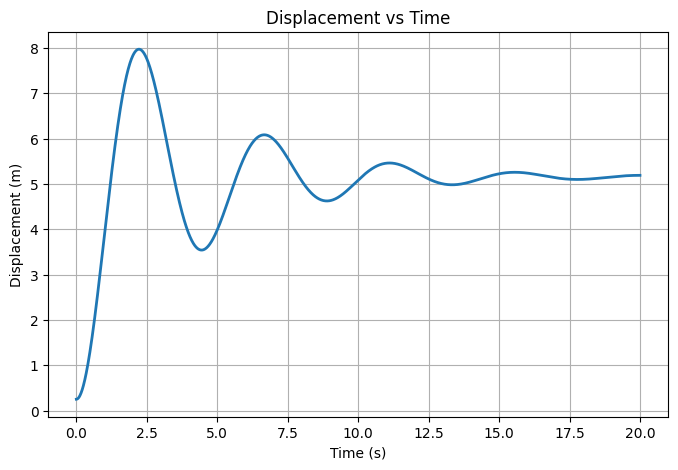

In [ ]:
# Graficar
plt.figure(figsize=(8, 5))
plt.plot(t, x, linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.grid(True)
plt.title('Displacement vs Time')
plt.show()